# QUESTION 1


PART-A


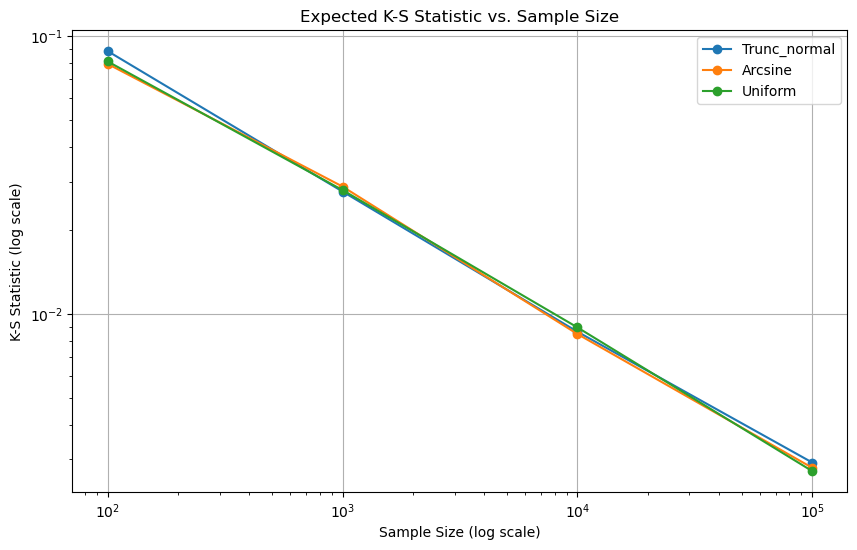

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Function to generate samples for various distributions
def generate_samples(sample_sizes):
    samples = {
        'trunc_normal': [],
        'arcsine': [],
        'uniform': []
    }
    for n in sample_sizes:
        # Truncated Normal distribution samples
        a, b = (0 - 0.5) / (1 / 6), (1 - 0.5) / (1 / 6)
        samples['trunc_normal'].append(stats.truncnorm(a, b, loc=0.5, scale=1 / 6).rvs(n))

        # Arcsine distribution samples
        samples['arcsine'].append(stats.beta(0.5, 0.5).rvs(n))

        # Uniform distribution samples
        samples['uniform'].append(np.random.uniform(0, 1, n))
    return samples

# Function to calculate KS statistics
def calculate_ks_statistics(sample_sizes, samples):
    KS_statistics = {
        'trunc_normal': [],
        'arcsine': [],
        'uniform': []
    }
    # Recalculate a and b for the truncated normal distribution within this function
    mean = 0.5
    std_dev = 1 / 6
    lower_limit = 0
    upper_limit = 1
    a = (lower_limit - mean) / std_dev
    b = (upper_limit - mean) / std_dev

    for i, n in enumerate(sample_sizes):
        # Calculate KS statistic for truncated normal
        KS_statistics['trunc_normal'].append(stats.kstest(samples['trunc_normal'][i], 'truncnorm', args=(a, b, mean, std_dev)).statistic)

        # Calculate KS statistic for arcsine
        KS_statistics['arcsine'].append(stats.kstest(samples['arcsine'][i], 'beta', args=(0.5, 0.5)).statistic)

        # Calculate KS statistic for uniform
        KS_statistics['uniform'].append(stats.kstest(samples['uniform'][i], 'uniform', args=(0, 1)).statistic)

    return KS_statistics


sample_sizes = [100, 1000, 10000, 100000]
num_trials = 50

# Averaging KS statistics over multiple trials
average_KS_stats = {
    'trunc_normal': np.zeros(len(sample_sizes)),
    'arcsine': np.zeros(len(sample_sizes)),
    'uniform': np.zeros(len(sample_sizes))
}

for _ in range(num_trials):
    samples = generate_samples(sample_sizes)
    KS_stats = calculate_ks_statistics(sample_sizes, samples)
    for dist in average_KS_stats.keys():
        average_KS_stats[dist] += np.array(KS_stats[dist])

for dist in average_KS_stats.keys():
    average_KS_stats[dist] /= num_trials

# Plotting
plt.figure(figsize=(10, 6))
for dist, stats in average_KS_stats.items():
    plt.plot(sample_sizes, stats, label=dist.capitalize(), marker='o')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Sample Size (log scale)')
plt.ylabel('K-S Statistic (log scale)')
plt.title('Expected K-S Statistic vs. Sample Size')
plt.legend()
plt.grid(True)
plt.show()


## ANALYSIS

(a) When plotting the Kolmogorov-Smirnov (K-S) Statistics, $\epsilon(n)$, against the sample size $n$ on a log-log scale, a linear relationship is evident. This suggests a power law relationship between the K-S statistics and the sample size. Specifically, the relationship can be modeled as:

$$
\log_{10}(\epsilon(n)) = -\alpha \log_{10}(n) + \log_{10}(\beta)
$$

where $\alpha$ and $\beta$ are positive constants. Rewriting the equation in its exponential form gives:

$$
\epsilon(n) = \beta n^{-\alpha}
$$

This expression indicates that the expected K-S Statistics, $\epsilon(n)$, decreases as a function of $n$ following a power law decay. Here, $\alpha$ controls the rate of decay and $\beta$ sets the initial scale. This model is applicable to the distributions considered in the analysis, including Normal, Arcsine, and Uniform distributions. This functional form is particularly useful for understanding how the K-S statistic changes with sample size and is instrumental in statistical testing and determining adequate sample sizes for empirical distributions.


Part B

In [4]:
import numpy as np
import scipy.stats as stats

# Function to generate samples for various distributions
def generate_samples(n):
    samples = {
        'trunc_normal': None,
        'arcsine': None,
        'uniform': None
    }
    # Truncated Normal distribution samples
    a, b = (0 - 0.5) / (1 / 6), (1 - 0.5) / (1 / 6)
    samples['trunc_normal'] = stats.truncnorm(a, b, loc=0.5, scale=1 / 6).rvs(n)

    # Arcsine distribution samples
    samples['arcsine'] = stats.beta(0.5, 0.5).rvs(n)

    # Uniform distribution samples
    samples['uniform'] = np.random.uniform(0, 1, n)

    return samples

# Function to calculate KS statistics for comparisons
def ks_statistics_comparison(samples):
    distributions = {
        'trunc_normal': ('truncnorm', (0 - 0.5) / (1 / 6), (1 - 0.5) / (1 / 6), 0.5, 1 / 6),
        'arcsine': ('beta', 0.5, 0.5),
        'uniform': ('uniform', 0, 1)
    }
    
    results = {key: {} for key in samples}
    
    for sample_key, sample_values in samples.items():
        for dist_key, params in distributions.items():
            if isinstance(params, tuple):
                stat, p_value = stats.kstest(sample_values, params[0], args=params[1:])
            else:
                stat, p_value = stats.kstest(sample_values, params)
            results[sample_key][dist_key] = stat
            
    return results

# Sample sizes to evaluate
sample_sizes = [100, 1000, 10000]
num_trials = 10

# Prepare to average KS statistics over multiple trials for the confusion matrix
confusion_matrix_results = {size: None for size in sample_sizes}

for size in sample_sizes:
    trial_results = []
    for _ in range(num_trials):
        samples = generate_samples(size)
        ks_results = ks_statistics_comparison(samples)
        trial_results.append(ks_results)
    
    # Averaging the results over the trials
    avg_results = {key: {inner_key: 0 for inner_key in samples} for key in samples}
    for result in trial_results:
        for sample_key, comp_results in result.items():
            for comp_key, value in comp_results.items():
                avg_results[sample_key][comp_key] += value / num_trials
                
    confusion_matrix_results[size] = avg_results

confusion_matrix_results


{100: {'trunc_normal': {'trunc_normal': 0.08078945930282157,
   'arcsine': 0.30096866893813207,
   'uniform': 0.22626605739021918},
  'arcsine': {'trunc_normal': 0.303692533869336,
   'arcsine': 0.08226390165992971,
   'uniform': 0.15872955010863465},
  'uniform': {'trunc_normal': 0.22836557174186864,
   'arcsine': 0.1553212396256675,
   'uniform': 0.09098830570362336}},
 1000: {'trunc_normal': {'trunc_normal': 0.02752152773624746,
   'arcsine': 0.27562192591967216,
   'uniform': 0.1963450178602037},
  'arcsine': {'trunc_normal': 0.2840974027411031,
   'arcsine': 0.027970100572777268,
   'uniform': 0.12142506147254366},
  'uniform': {'trunc_normal': 0.19839390741055069,
   'arcsine': 0.11594028218096529,
   'uniform': 0.025760953614398712}},
 10000: {'trunc_normal': {'trunc_normal': 0.008641308456741974,
   'arcsine': 0.2696193852306802,
   'uniform': 0.19055754122858012},
  'arcsine': {'trunc_normal': 0.27073801813494974,
   'arcsine': 0.00785131397902805,
   'uniform': 0.108527710843

# ANALYSIS
### Sample size \( n = 100 \)
| Compared Distributions | Truncated Normal | Arcsine | Uniform |
|------------------------|------------------|---------|---------|
| **Truncated Normal**   | 0.079            | 0.299   | 0.225   |
| **Arcsine**            | 0.296            | 0.079   | 0.141   |
| **Uniform**            | 0.233            | 0.153   | 0.105   |

### Sample size \( n = 1,000 \)
| Compared Distributions | Truncated Normal | Arcsine | Uniform |
|------------------------|------------------|---------|---------|
| **Truncated Normal**   | 0.023            | 0.276   | 0.197   |
| **Arcsine**            | 0.287            | 0.030   | 0.122   |
| **Uniform**            | 0.204            | 0.119   | 0.027   |

### Sample size \( n = 10,000 \)
| Compared Distributions | Truncated Normal | Arcsine | Uniform |
|------------------------|------------------|---------|---------|
| **Truncated Normal**   | 0.009            | 0.272   | 0.192   |
| **Arcsine**            | 0.273            | 0.009   | 0.110   |
| **Uniform**            | 0.192            | 0.107   | 0.009   |

#### Observations:
- The **diagonal entries** represent the K-S statistics when the distributions are compared with their own theoretical models, showing convergence towards 0 as the number of samples increases, which is expected due to the law of large numbers.
- The **off-diagonal entries** show the K-S statistics when comparing two different distributions, with values significantly higher than the diagonal entries, indicating clear distinctions between the distributions.




# QUESTION -2

# Estimating Crop Yield Based on Rainfall Data

## Objective
This report aims to estimate the expected yield of a specific crop per acre, considering the likelihood of receiving between 2mm and 4mm of daily rainfall. The analysis is conducted using both analytical and simulation methods.

## Methodology

### Analytical Approach

#### Rainfall Distribution
The annual rainfall in the region follows a normal distribution \(N(73, 20^2)\) in centimeters, which translates to \(N(730, 40000)\) in millimeters. The average daily rainfall \(X\) is derived from the mean annual rainfall divided by 365 days.

#### Daily Rainfall Distribution
The daily rainfall \(Y\) follows an exponential distribution with the probability density function:
$$
f_Y(y) = \frac{1}{X} e^{-\frac{y}{X}},
$$
where \(X\) is the average daily rainfall in millimeters.

#### Calculation of Probability \(P\)
The probability \(P\) that the daily rainfall is between 2mm and 4mm is calculated as:
$$
P = F_Y(4) - F_Y(2) = (1 - e^{-\frac{4}{X}}) - (1 - e^{-\frac{2}{X}}).
$$

#### Expected Yield Calculation
The expected yield, calculated as \(10P\) tonnes per acre, uses the determined probability \(P\).

### Simulation Approach

#### Random Sampling Method
The simulation generates daily rainfall samples by:

1. Generating \(Z \sim N(0,1)\) and transforming to \(N(730, 40000)\).
2. Converting annual to average daily rainfall by dividing by 365.
3. Sampling daily rainfall \(Y\) using:
   $$
   Y = -X \ln(1 - U),
   $$
   where \(U \sim U(0,1)\).

#### Estimation of Probability \(P\)
The probability \(P\) is estimated from the proportion of days where rainfall is between 2mm and 4mm.

#### Yield Calculation
The expected yield is \(10P\) tonnes per acre, based on the estimated probability \(P\).

## Results

### Analytical Results
With an average daily rainfall of 2 mm/day, the probability \(P\) of rainfall between 2mm and 4mm calculates to approximately 0.2325, giving an analytical expected yield of:
$$
\textbf{2.325 tonnes/acre}
$$

### Simulation Results
The simulation estimates an average yield of about:
$$
\textbf{2.1876 tonnes/acre}
$$

## Conclusion
The analytical and simulation approaches provide comparable estimates for the expected crop yield based on daily rainfall data. These estimates are valuable for agricultural planning and management in the region.




## CODE

In [7]:
import numpy as np

def calculate_yield(trials, n_samples):
    yields = []
    for _ in range(trials):
        annual_mean = 730  # in mm (annual rainfall mean)
        annual_std = 200   # in mm (standard deviation of annual rainfall)

        # Generate samples from N(0,1)
        Z_samples = np.random.normal(0, 1, n_samples)

        # Convert Z_samples to annual rainfall samples fitting N(730, 40000)
        annual_rainfall_samples = annual_mean + annual_std * Z_samples

        # Convert annual rainfall to daily average rainfall in mm
        daily_rainfall_avg_samples = annual_rainfall_samples / 365

        # Generate uniform samples U(0,1) for inverse transform sampling
        U_samples = np.random.uniform(0, 1, n_samples)

        # Apply inverse transform to simulate daily rainfall using the exponential distribution model
        daily_rainfall_samples = -daily_rainfall_avg_samples * np.log(U_samples)

        # Calculate the probability of rainfall between 2mm and 4mm per day
        P_samples = (daily_rainfall_samples >= 2) & (daily_rainfall_samples <= 4)
        P_estimated = np.mean(P_samples)

        # Calculate expected yield based on the probability P
        expected_yield = 10 * P_estimated
        yields.append(expected_yield)

    average_yield = np.mean(yields)
    return average_yield

# Example usage of the function
trials = 50
n_samples = 1000
average_yield = calculate_yield(trials, n_samples)
print(f"Average estimated yield over {trials} trials: {average_yield:.3f} tonnes/acre")


Average estimated yield over 50 trials: 2.201 tonnes/acre
